In [99]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [100]:
dataset = load_digits()
print(dataset)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ..

In [101]:
print(dataset.data.shape)

(1797, 64)


In [102]:
print(dataset.target.shape)

(1797,)


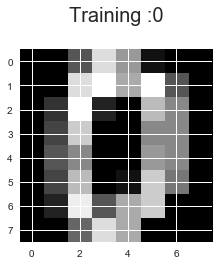

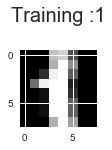

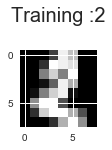

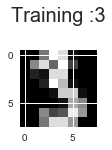

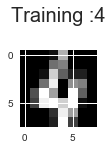

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for idx , (image , label) in enumerate(zip(dataset.data[0:5],dataset.target[0:5])):
    plt.subplot(1,5,idx +1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training :%i\n'%label,fontsize = 20)
    plt.show()

In [104]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(dataset.data , dataset.target , test_size = 0.23 , random_state =2)

In [105]:
print(X_train.shape)

(1383, 64)


In [107]:
from sklearn.linear_model import LogisticRegression

In [109]:
logres = LogisticRegression()
logres.fit(X_train , Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
print(logres.predict(X_test[0].reshape(1,-1)))

[4]


In [111]:
score =logres.score(X_test, Y_test)
print(score)

0.942028985507


In [117]:
cm = metrics.confusion_matrix(Y_test , logres.predict(X_test))
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


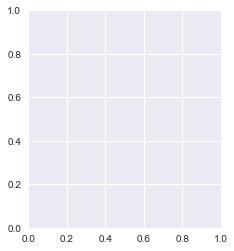

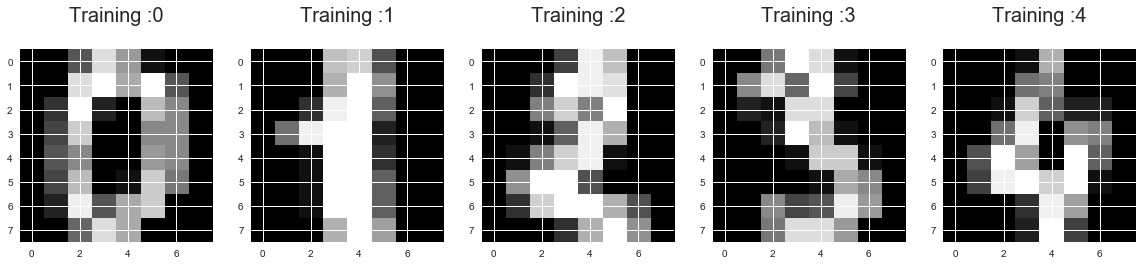

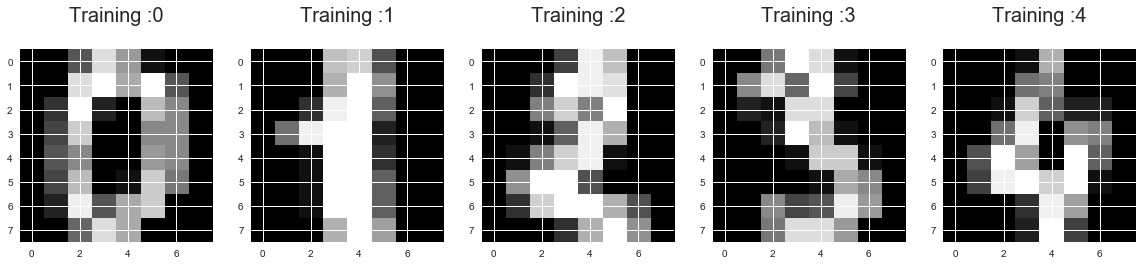

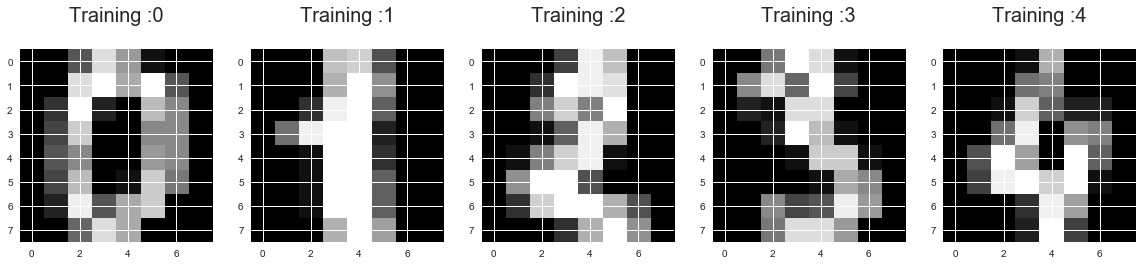

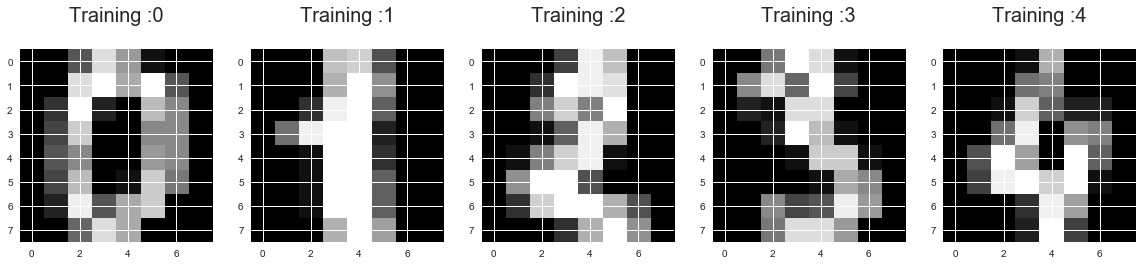

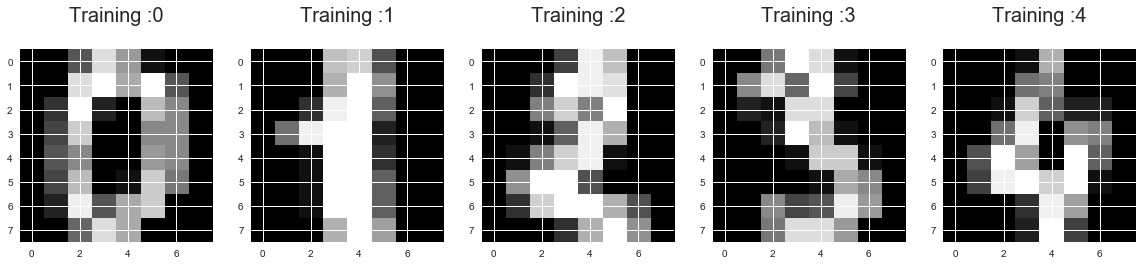

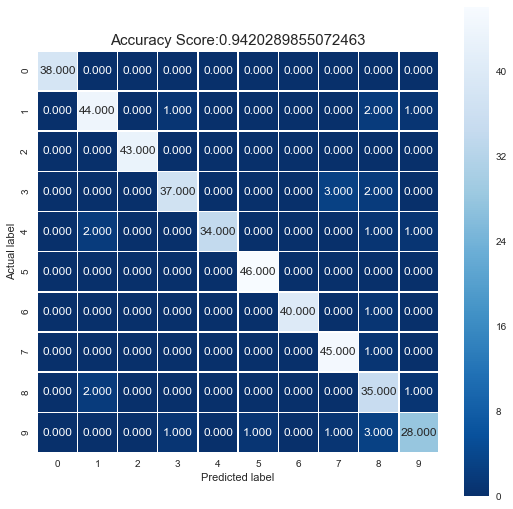

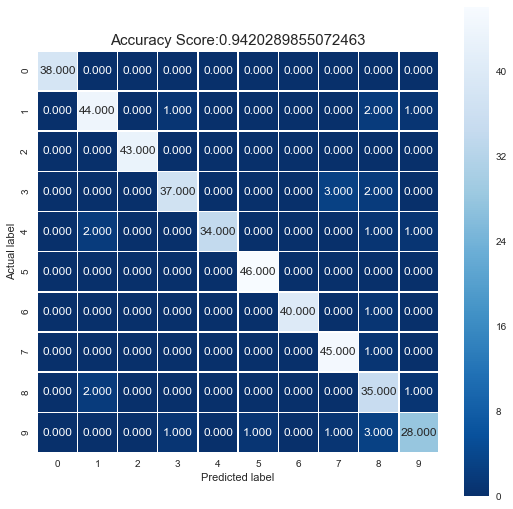

In [123]:
plt.figure(figsize=(9,9))

sns.heatmap(cm , annot= True, fmt = '.3f' , linewidths=.5 ,square=True ,cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size =15)
plt.show()